In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [3]:
d = './concrete'
m =  "FolderML" # add a string here
img_size = 28 # add an int here
nb_epochs =  2 # add an int here
validation_split = 0.2 #add a float here (train split will be 1 - validation split)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=validation_split)  # set validation split

In [4]:
train_generator = train_datagen.flow_from_directory??

Signature:
train_datagen.flow_from_directory(
    directory,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
)
Source:   
    def flow_from_directory(
        self,
        directory,
        target_size=(256, 256),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=32,
        shuffle=True,
        seed=None,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        follow_links=False,
        subset=None,
        interpolation="nearest",
        keep_aspect_ratio=False,
    ):
        """Takes the path to a directory & generates batches of augmented data.

        Args:
            directory: string, path to the target directory. It should contain

In [5]:
train_generator = train_datagen.flow_from_directory(
    d,
    target_size=(img_size, img_size),
    class_mode='binary', # fill with suitable - categorical / binary
    subset='training')  # set as training data

validation_generator = train_datagen.flow_from_directory(
    d,
    target_size=(img_size, img_size),
    class_mode= 'binary', # fill with suitable - categorical / binary
    subset='validation')  # set as validation data

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [6]:
# Write a CNN model and train it
model = models.Sequential()
# Write the model layer code here
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(28,28,3)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 256)               692480    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                        

In [7]:
# Compile the model using following
# create compile model with "optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']""

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Define the callback to save the best model based on validation accuracy
checkpoint_callback = ModelCheckpoint(
    filepath=m,
    monitor='val_accuracy',
    save_best_only=True,     # Save only the best model
    mode='max',              # Set the mode to maximize the chosen metric
    verbose=1
)

history = model.fit(train_generator, validation_data=validation_generator, callbacks=[
                    checkpoint_callback], epochs=nb_epochs)

Epoch 1/2
 727/1000 [====================>.........] - ETA: 2:20 - loss: 0.0901 - accuracy: 0.9679

## **Evaluate Model**

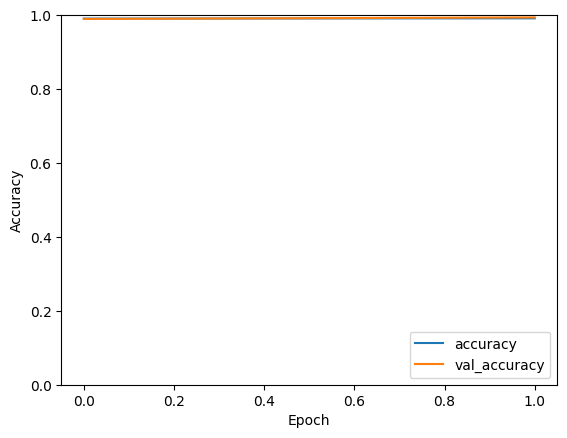

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
model = tf.keras.models.load_model(m)
labels = (train_generator.class_indices)
print(labels)
path = './test/'
k = []
names = []
for filename in os.listdir(path):
    p = os.path.join(path, filename)
    if 'jpg' in p:
        # print(p)
        c = cv2.imread(p)
        c = cv2.resize(c, (img_size, img_size), interpolation=cv2.INTER_LINEAR)
        k.append(c)
        names.append(filename)
k = np.array(k)

class_names =  ['negative','positive'] #Fill here: Write the array of negative and positive
predicted_labels = (model.predict(k) > 0.5).astype("int32")
predicted_labels = predicted_labels.flatten()
predicted_labels = [class_names[i] for i in predicted_labels]

test_arr = []
for i in names:
    if i[0] == 'n':
        test_arr.append(0)
    elif i[0] == 'p': # fix here
        test_arr.append(1)
test_arr = np.array(test_arr)

if (len(test_arr) == len(k)):
    score = model.evaluate(k, test_arr)
    # print(labels) # print this
    # print(names) # print this
    print('Test loss:', ) # Fix here
    print('Test accuracy:', score) # Fix here
    
else:
    print("Something wrong with the prediction.") # If you are getting this, you need to look into code.

{'Negative': 0, 'Positive': 1}
1/1 [==============================] - 0s 96ms/step - loss: 0.1260 - accuracy: 0.9167
Test loss:
Test accuracy: [0.12599827349185944, 0.9166666865348816]


In [ ]:
test_arr

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
! pip install joblib

In [ ]:
import joblib
with open ("best.h5","wb") as file:
    joblib.dump(model,file)